In [ ]:
from langgraph.graph import START, StateGraph
from typing import TypedDict

# Define subgraph
class SubgraphState(TypedDict):
    foo: str  # note that this key is shared with the parent graph state
    bar: str

def subgraph_node_1(state: SubgraphState):
    return {"bar": "barsss"}

def subgraph_node_2(state: SubgraphState):
    return {"foo": state["foo"] + state["bar"]}

subgraph_builder = StateGraph(SubgraphState)
subgraph_builder.add_node(subgraph_node_1)
subgraph_builder.add_node(subgraph_node_2)
subgraph_builder.add_edge(START, "subgraph_node_1")
subgraph_builder.add_edge("subgraph_node_1", "subgraph_node_2")
subgraph = subgraph_builder.compile()



((), {'node_1': {'foo': 'hi! foo'}})
(('node_2:a0df07ab-7dc8-0259-403d-312d8b371743',), {'subgraph_node_1': {'bar': 'bar'}})
(('node_2:a0df07ab-7dc8-0259-403d-312d8b371743',), {'subgraph_node_2': {'foo': 'hi! foobar'}})
((), {'node_2': {'foo': 'hi! foobar'}})


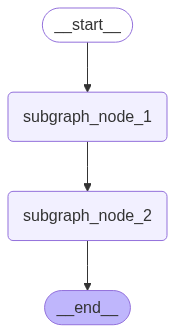

In [4]:
subgraph

In [ ]:

# Define parent graph
class ParentState(TypedDict):
    foo: str

def node_1(state: ParentState):
    return {"foo": "hi! " + state["foo"]}

builder = StateGraph(ParentState)
builder.add_node("node_1", node_1)
builder.add_node("node_2", subgraph)
builder.add_edge(START, "node_1")
builder.add_edge("node_1", "node_2")
graph = builder.compile()


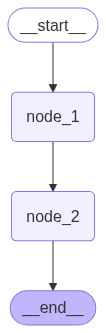

In [3]:
graph

In [2]:
for chunk in graph.stream(
    {"foo": "foo"},
    stream_mode="updates",
    subgraphs=True, 
):
    print(chunk)

((), {'node_1': {'foo': 'hi! foo'}})
(('node_2:b193e962-0b33-9a27-1941-86f5a50f6142',), {'subgraph_node_1': {'bar': 'bar'}})
(('node_2:b193e962-0b33-9a27-1941-86f5a50f6142',), {'subgraph_node_2': {'foo': 'hi! foobar'}})
((), {'node_2': {'foo': 'hi! foobar'}})
